# Basic Image Enhancement Using Mathematical Operations

Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover:

* Arithmetic Operations like addition, multiplication
* Thresholding & Masking
* Bitwise Operations like OR, AND, XOR, NOT


In [81]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### <font color="green">Original image</font>

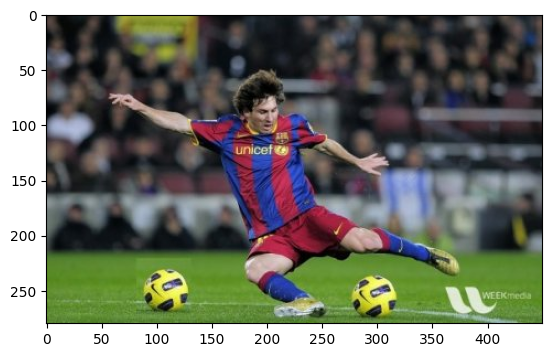

In [82]:
img_bgr = cv.imread("Images/messi5.jpg", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Display 18x18 pixel image.
plt.imshow(img_rgb)

## Addition or Brightness
The first operation we discuss is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

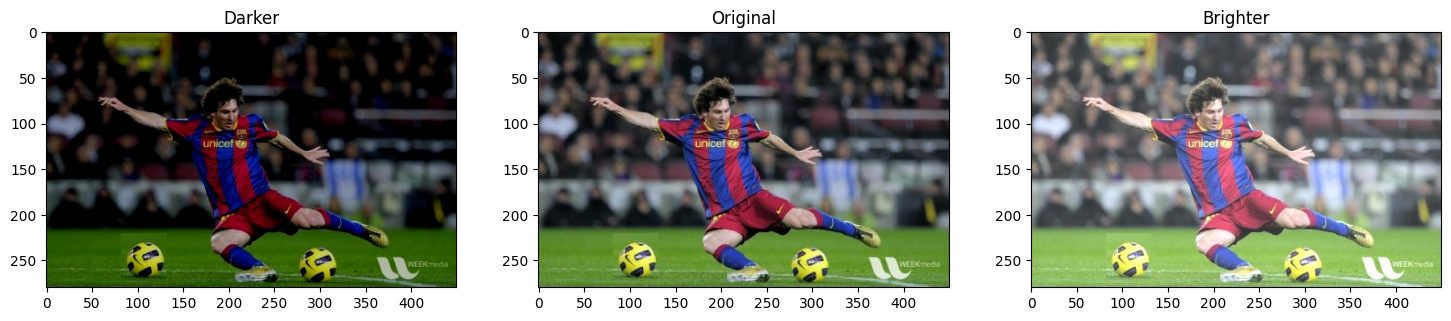

In [83]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv.add(img_rgb, matrix)
img_rgb_darker   = cv.subtract(img_rgb, matrix)


# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

## Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

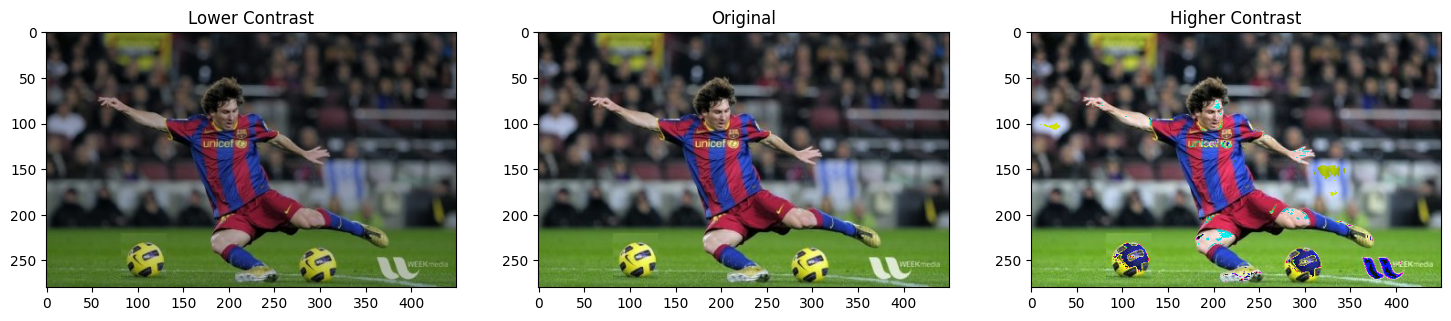

In [84]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

### <font color="green">What happened?</font>
Can you see the weird colors in some areas of the image after multiplication?

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. How do we overcome this?

### <font color="green">Handling Overflow using np.clip</font>

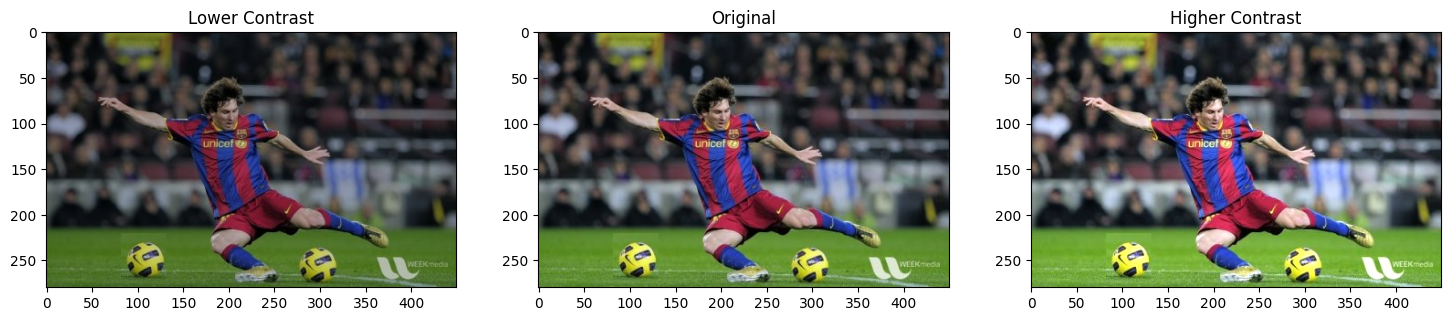

In [85]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv.multiply(np.float64(img_rgb), matrix2), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);       plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

## Image Thresholding
Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).

2. `thresh`: threshold value.

3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

4. `type`: thresholding type (see ThresholdTypes).


### <font color="green">Function Syntax </font>

``` python
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied

3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

<a href="https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57
https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html" target="_blank">Documentation link</a>

(572, 800)


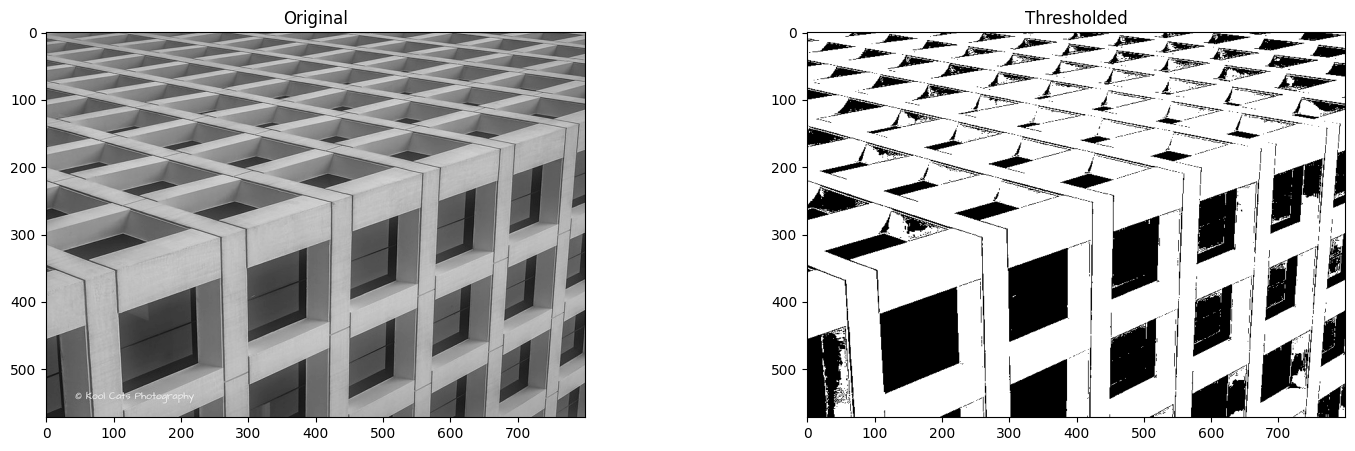

In [86]:
img_read = cv.imread("Images/building-windows.jpg", cv.IMREAD_GRAYSCALE)
retval, img_thresh = cv.threshold(img_read, 100, 255, cv.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

## Application: Sheet Music Reader
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to
Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding
techniques. Let's take a look at an example.

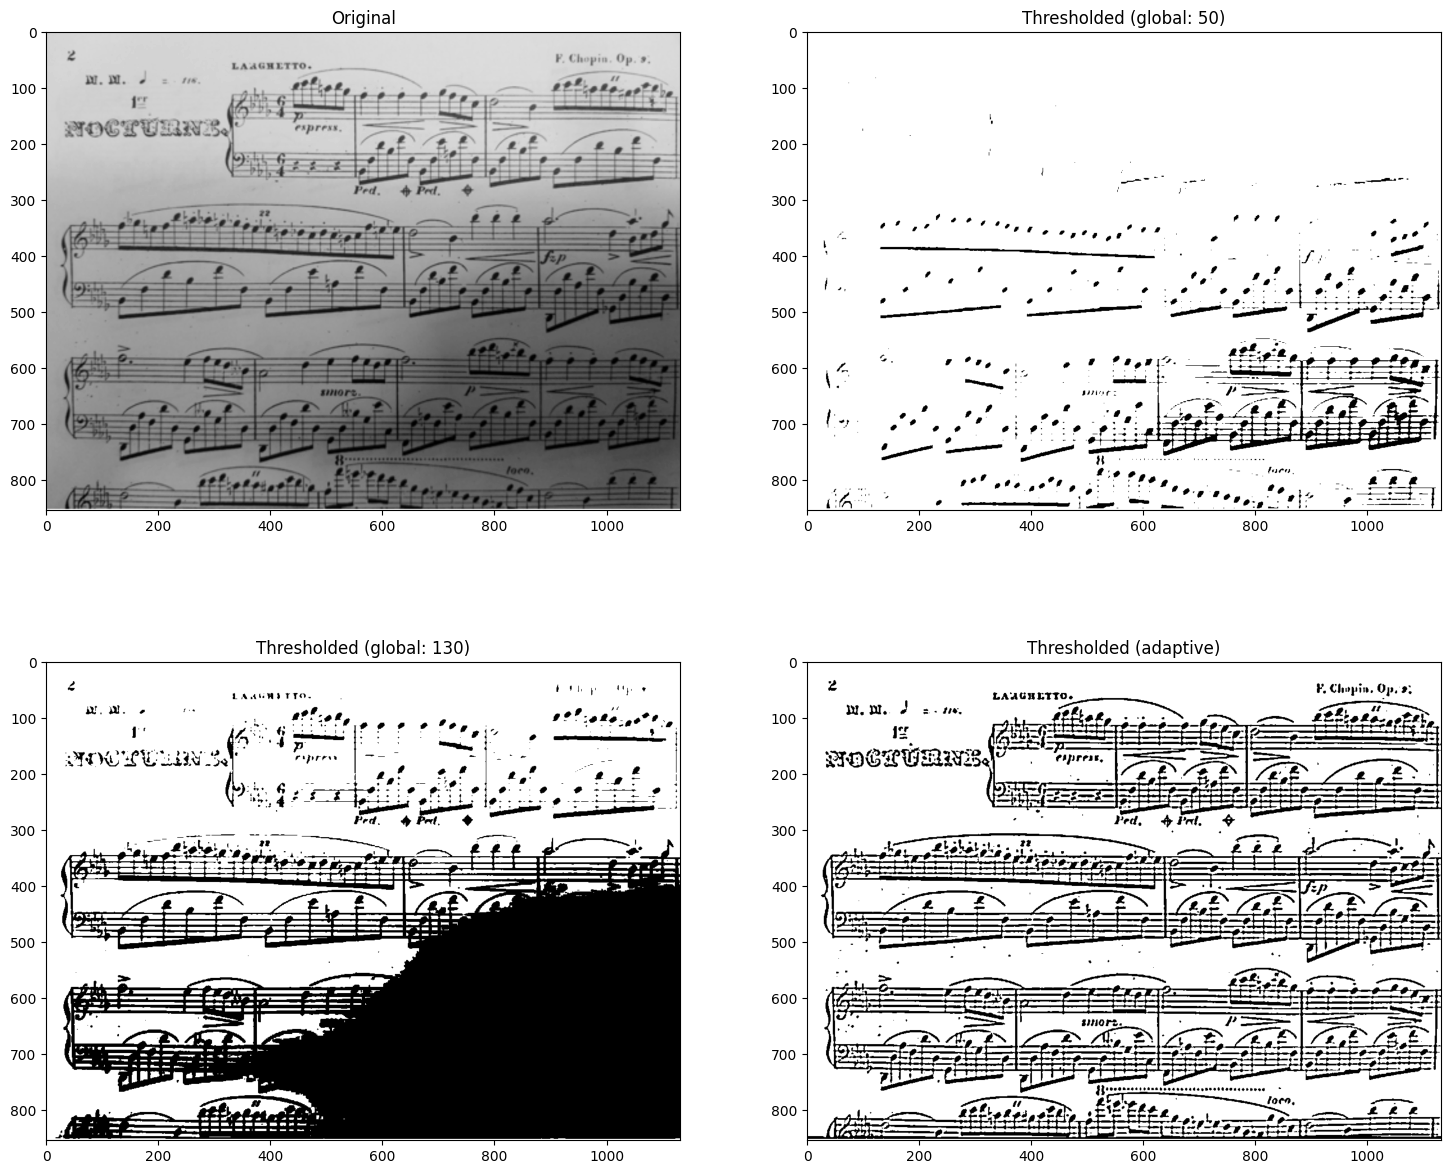

In [87]:
# Read the original image
img_read = cv.imread("Images/Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv.threshold(img_read, 130, 255, cv.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

## Bitwise Operations

### <font style="color:rgb(8,133,37)">Function Syntax</font>

Example API for `cv.bitwise_and()`. Others include: `cv.bitwise_or()`, `cv.bitwise_xor()`, `cv.bitwise_not()`

``` python
dst = cv.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.

2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. <a href="https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html" target="_blank">Arithmetic Operations on Images</a>

2. <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14" target="_blank">bitwise_and(...) function</a>

(200, 499)


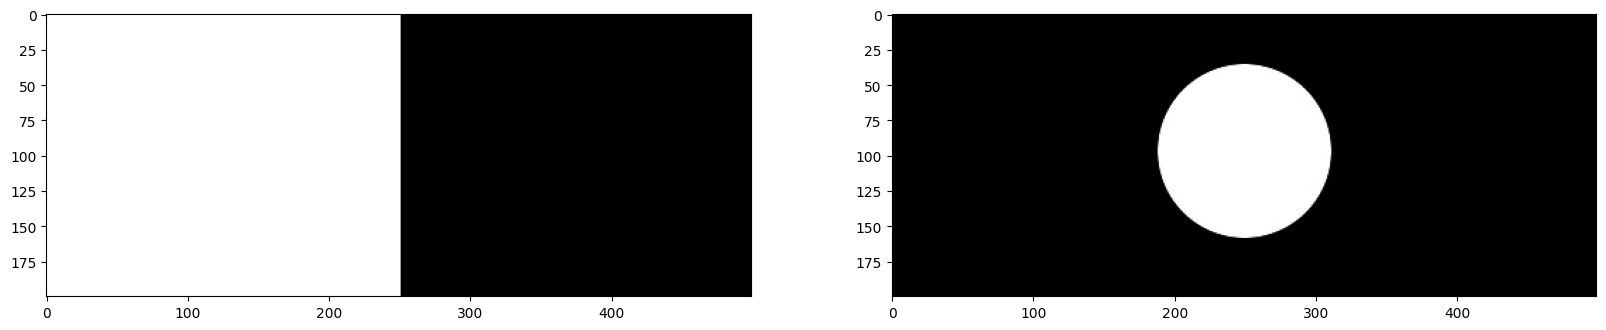

In [88]:
img_rec = cv.imread("Images/rectangle.jpg", cv.IMREAD_GRAYSCALE)

img_cir = cv.imread("Images/circle.jpg", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

### <font color="green">Bitwise AND Operator </font>

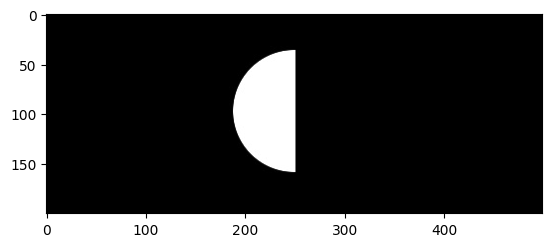

In [89]:
result = cv.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### <font color="green">Bitwise OR Operator </font>

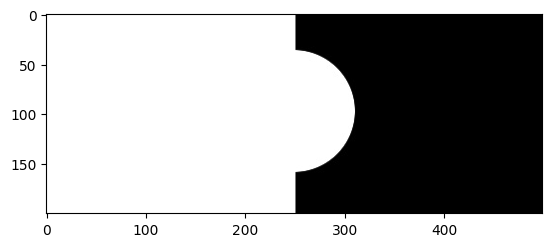

In [90]:
result = cv.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### <font color="green">Bitwise XOR Operator </font>

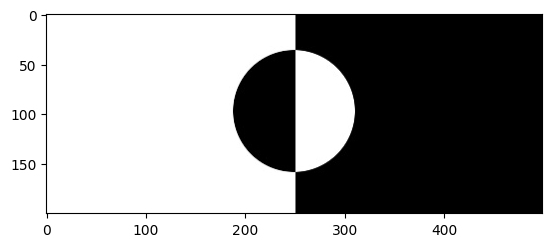

In [91]:
result = cv.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

## Application: Logo Manipulation

In this section we will show you how to fill in the white lettering of the Coca-Cola logo below with a background image.

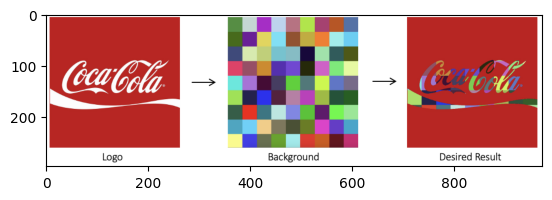

In [92]:
image=cv.imread("Images/Logo_Manipulation.png")
image=cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

### <font color="green">Read Foreground image</font>

(700, 700, 3)


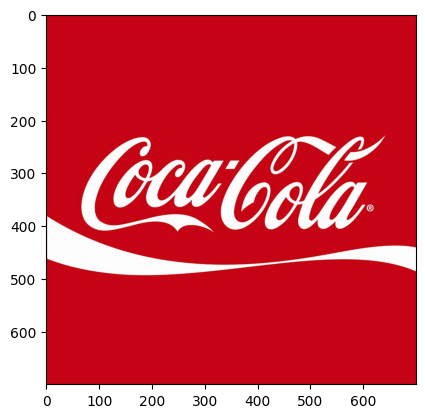

In [93]:
img_bgr = cv.imread("Images/coca-cola-logo.png")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

### <font color="green">Read Background image</font>

(700, 700, 3)


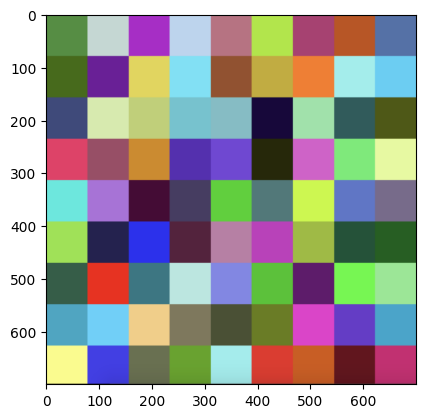

In [94]:
# Read in image of color cheackerboad background
img_background_bgr = cv.imread("Images/checkerboard_color.png")
img_background_rgb = cv.cvtColor(img_background_bgr, cv.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv.resize(img_background_rgb, dim, interpolation=cv.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### <font color="green">Create Mask for original Image</font>

(700, 700)

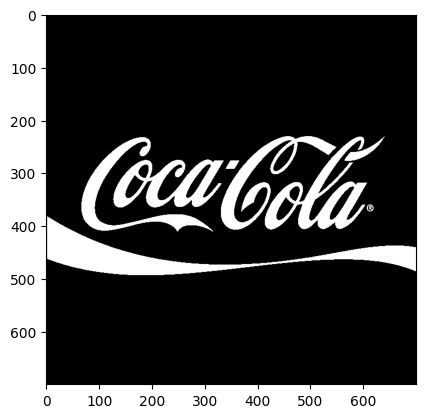

In [95]:
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

### <font color="green">Invert the Mask </font>

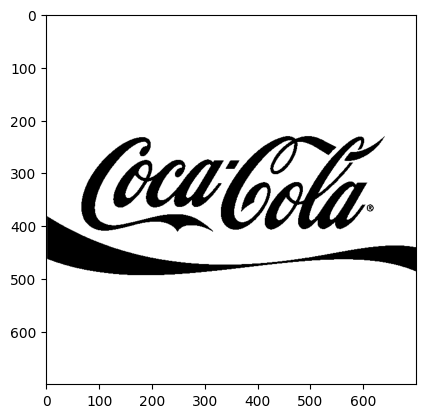

In [96]:
# Create an inverse mask
img_mask_inv = cv.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

### <font color="green">Apply background on the Mask</font>

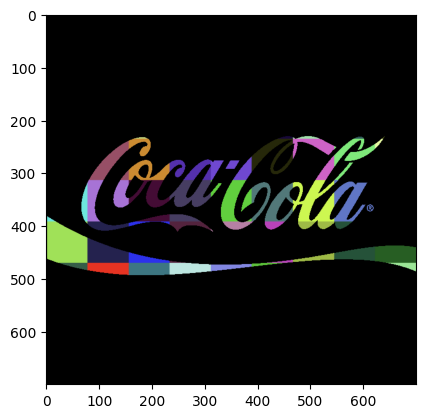

In [97]:
# Create colorful background "behind" the logo lettering
img_background = cv.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### <font color="green">Isolate foreground from image</font>

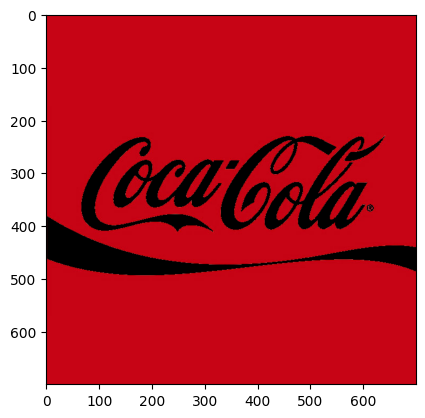

In [98]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)


### <font color="green">Result: Merge Foreground and Background</font>

True

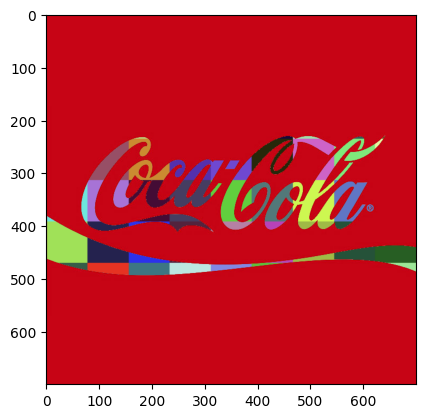

In [99]:
# Add the two previous results obtain the final result
result = cv.add(img_background, img_foreground)
plt.imshow(result)
cv.imwrite("logo_final.png", result[:, :, ::-1])

Image Negation

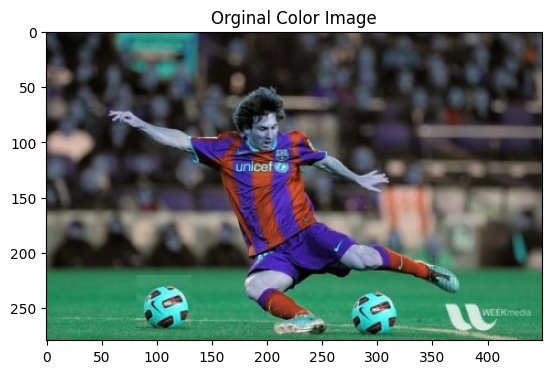

In [100]:
img = cv.imread('Images/messi5.jpg')
# Show the image
plt.imshow(img), plt.title('Orginal Color Image')
img=img[:, :, ::-1]


(<matplotlib.image.AxesImage at 0x1c22d58e990>,
 Text(0.5, 1.0, 'Orginal Color Image'))

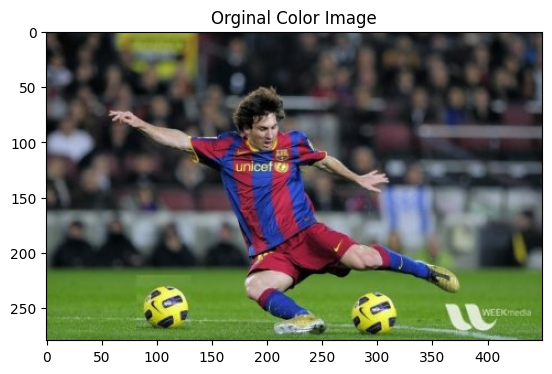

In [101]:
plt.imshow(img), plt.title('Orginal Color Image')


(<matplotlib.image.AxesImage at 0x1c231c100d0>,
 Text(0.5, 1.0, 'color negative'))

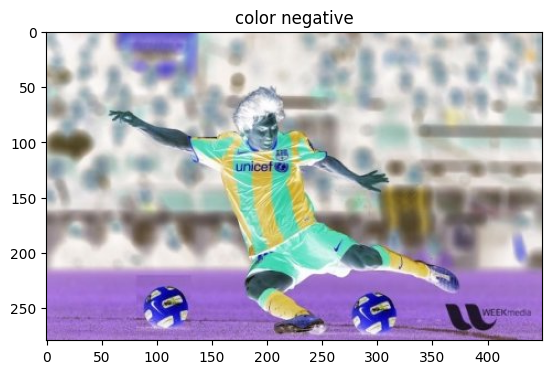

In [102]:
img_neg = cv.bitwise_not(img)
# Show the image
plt.imshow(img_neg), plt.title('color negative')


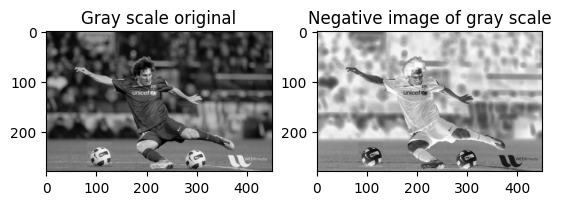

In [103]:
img = cv.imread('Images/messi5.jpg',0)
img=img[:-1]# Invert the image using cv.bitwise_not
img_neg = cv.bitwise_not(img)
# Show the image
plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title('Gray scale original')
plt.subplot(122),plt.imshow(img_neg,cmap="gray"),plt.title('Negative image of gray scale')
plt.show()

### Goal
Learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.
Learn these functions: cv.add(), cv.addWeighted(), etc.

##### Image Addition
You can add two images with the OpenCV function, cv.add(), or simply by the numpy operation res = img1 + img2. 

Both images should be of same depth and type, or the second image can just be a scalar value.

#### Note
###### There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

In [104]:
x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x,y))  # 250+10=> 255 saturation operation
print(x+y)  # modulo opertaion, 250,8 bits can store upto 255, 0,1,2,3,4  so value is 4 

[[255]]
[4]


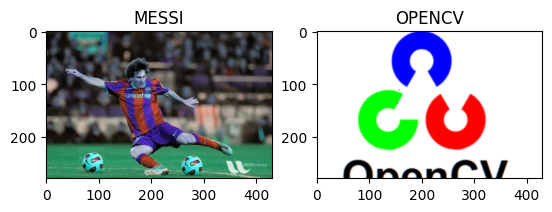

In [105]:
img1 = cv.imread('Images/messi5.png')
img2 = cv.imread('Images/opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

plt.subplot(121),plt.imshow(img1),plt.title('MESSI')
plt.subplot(122),plt.imshow(img2),plt.title('OPENCV')
plt.show()



In [106]:
#To add, two image sizes should be same
print("To add, two image sizes should be same")
print(img1.shape)
print(img2.shape)

To add, two image sizes should be same
(280, 430, 3)
(280, 430, 3)


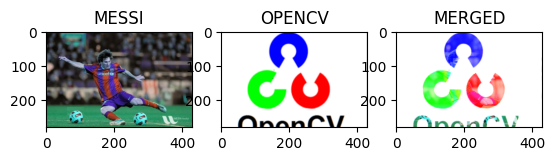

In [107]:
dst=cv.add(img1, img2)
plt.subplot(131),plt.imshow(img1),plt.title('MESSI')
plt.subplot(132),plt.imshow(img2),plt.title('OPENCV')
plt.subplot(133),plt.imshow(dst),plt.title('MERGED')

plt.show()


##### Image Blending
This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency. Images are added as per the equation below:

##### g(x)=(1−α)f0(x)+αf1(x)
By varying α from 0→1, you can perform a cool transition between one image to another.

Here I took two images to blend together. The first image is given a weight of 0.7 and the second image is given 0.3.
##### cv.addWeighted() applies the following equation to the image:

#### dst=α⋅img1+β⋅img2+γ

Here γ is taken as zero.

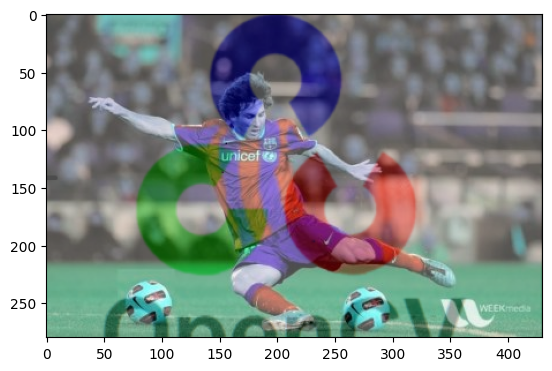

In [108]:
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(dst)

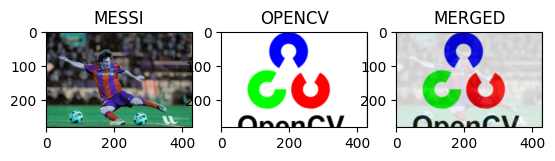

In [109]:
dst = cv.addWeighted(img1,0.2,img2,0.8,0)
plt.subplot(131),plt.imshow(img1),plt.title('MESSI')
plt.subplot(132),plt.imshow(img2),plt.title('OPENCV')
plt.subplot(133),plt.imshow(dst),plt.title('MERGED')

plt.show()
